In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
M = nx.read_gml("polblogs.gml")

In [3]:
# create weighted graph from M
G = nx.Graph()
blogsite = []
for u,v,data in M.edges_iter(data=True):
    blogsite.append(u)
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)

### 1.  Create a nice looking graph of the political blog network

C:\Users\Karla\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


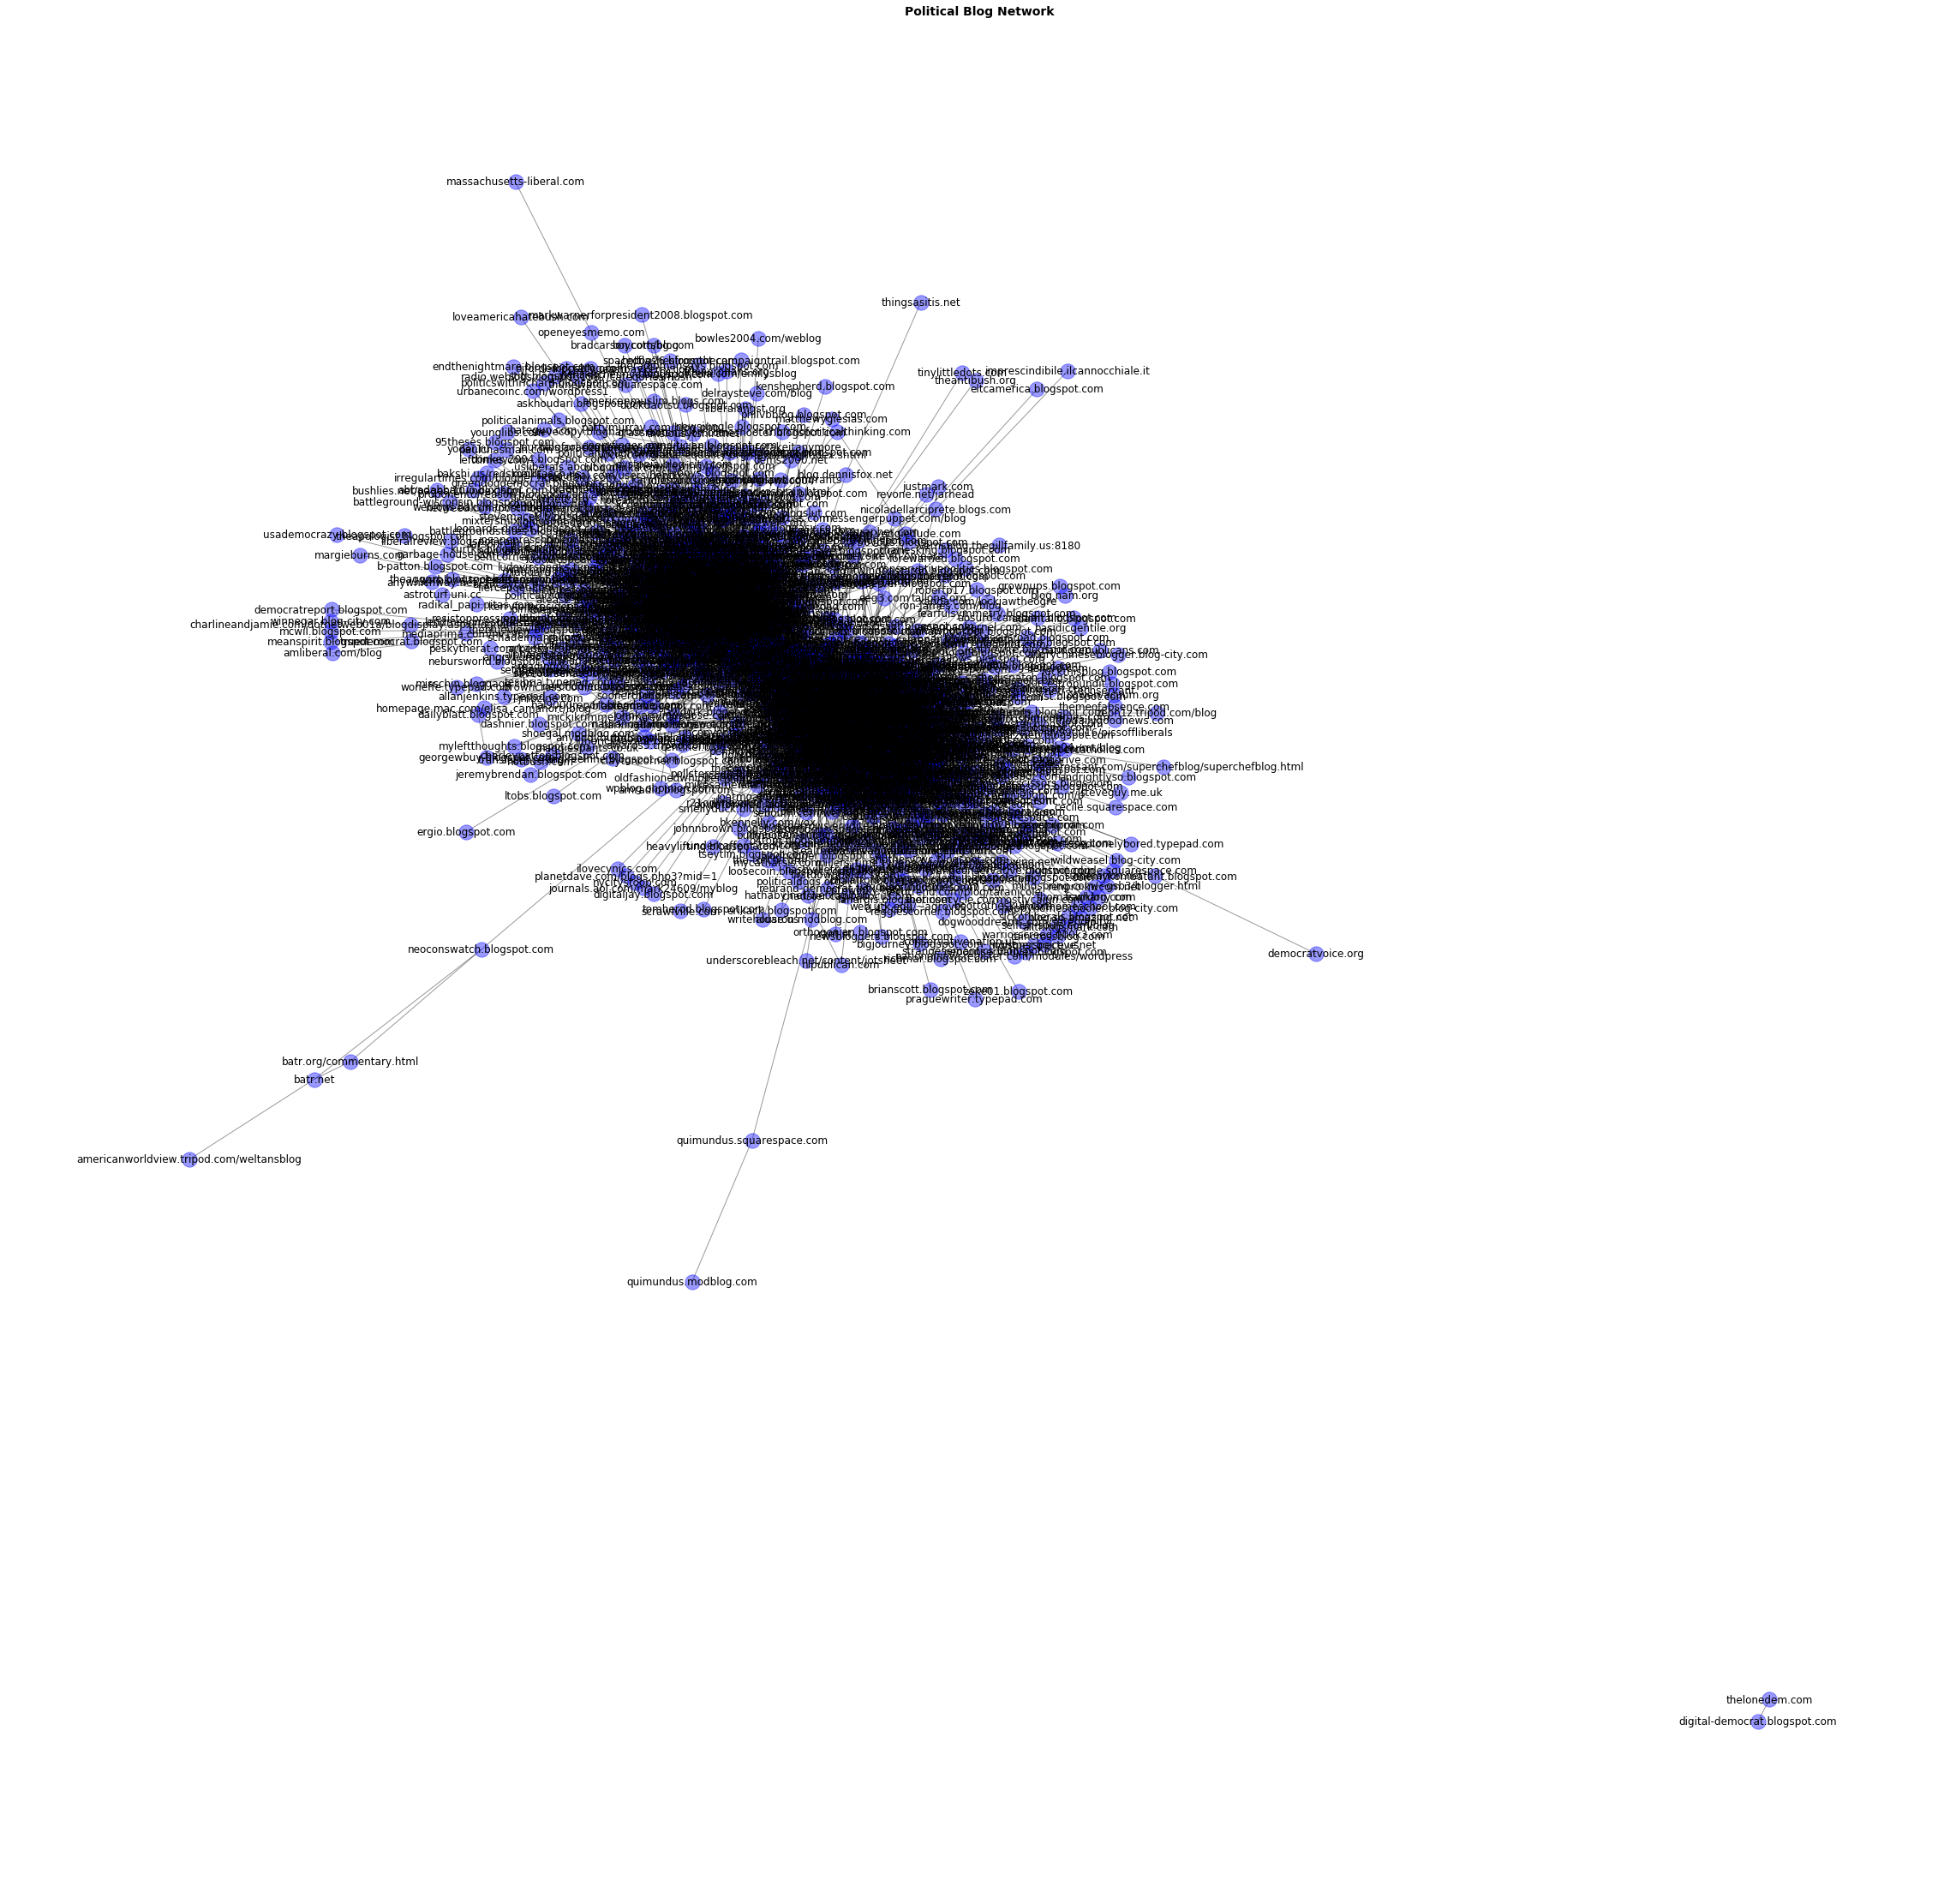

In [4]:
# Here we need only borrow Mikes code from the Boston - 1776 lecture
# We can see two big clusters in the graph. These most likely correspond 
# to the left and right wing groups.
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=10, k=.4)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 14}
plt.title("Political Blog Network", font)


nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

### 2.  What are the 10 most influential blogs?

In [5]:
# To find the 10 most influential blogs we can use eignevector_centrality().
centrality=nx.eigenvector_centrality(G)

In [6]:
blog_list = []
for node in centrality:
    blog_list.append((node,centrality[node]))
    
sorted_blog_list = blog_list.sort(key=lambda x: x[1])

In [7]:
# The following are the 10 most influential blogs
sorted(blog_list, key=lambda x: x[1], reverse=True)[:10]

[('atrios.blogspot.com', 0.19480797936637684),
 ('dailykos.com', 0.1608974020523482),
 ('washingtonmonthly.com', 0.14653924259836862),
 ('digbysblog.blogspot.com', 0.1426436922171831),
 ('bodyandsoul.typepad.com', 0.14113489174330351),
 ('liberaloasis.com', 0.1395237157110786),
 ('tbogg.blogspot.com', 0.1370364169982425),
 ('corrente.blogspot.com', 0.1294175927409614),
 ('talkingpointsmemo.com', 0.12700519780790948),
 ('dneiwert.blogspot.com', 0.12237564692546019)]

### 3.  What are the 10 least influential blogs?



In [8]:
# This is found by selecting the last ten items in the sorted blog_list
sorted(blog_list, key=lambda x: x[1], reverse=True)[-10:]

[('thingsasitis.net', 1.1736249650658601e-05),
 ('massachusetts-liberal.com', 9.4833652357345e-06),
 ('quimundus.squarespace.com', 6.061741218869528e-06),
 ('democratvoice.org', 1.0233388204113296e-06),
 ('batr.net', 6.796325594929456e-07),
 ('batr.org/commentary.html', 6.795517611554003e-07),
 ('quimundus.modblog.com', 6.682929975006485e-08),
 ('americanworldview.tripod.com/weltansblog', 7.491540638916238e-09),
 ('digital-democrat.blogspot.com', 1.7763251097559653e-72),
 ('thelonedem.com', 1.7763251097559653e-72)]

### 4.  Answer this question for both left wing and right wing blogs seperately.  (Optional 10 Extra Credit Points)

In [9]:
# We need to determine which are left wing blogs and which are right wing blogs. 
# Viewing the map above, we can see that there are two big cliques. Those 
# clusters most likely correspond to the two political groups. We can try using 
# Gephi to see the two cliques more clearly. 
nx.write_gexf(G,'network.gexf')

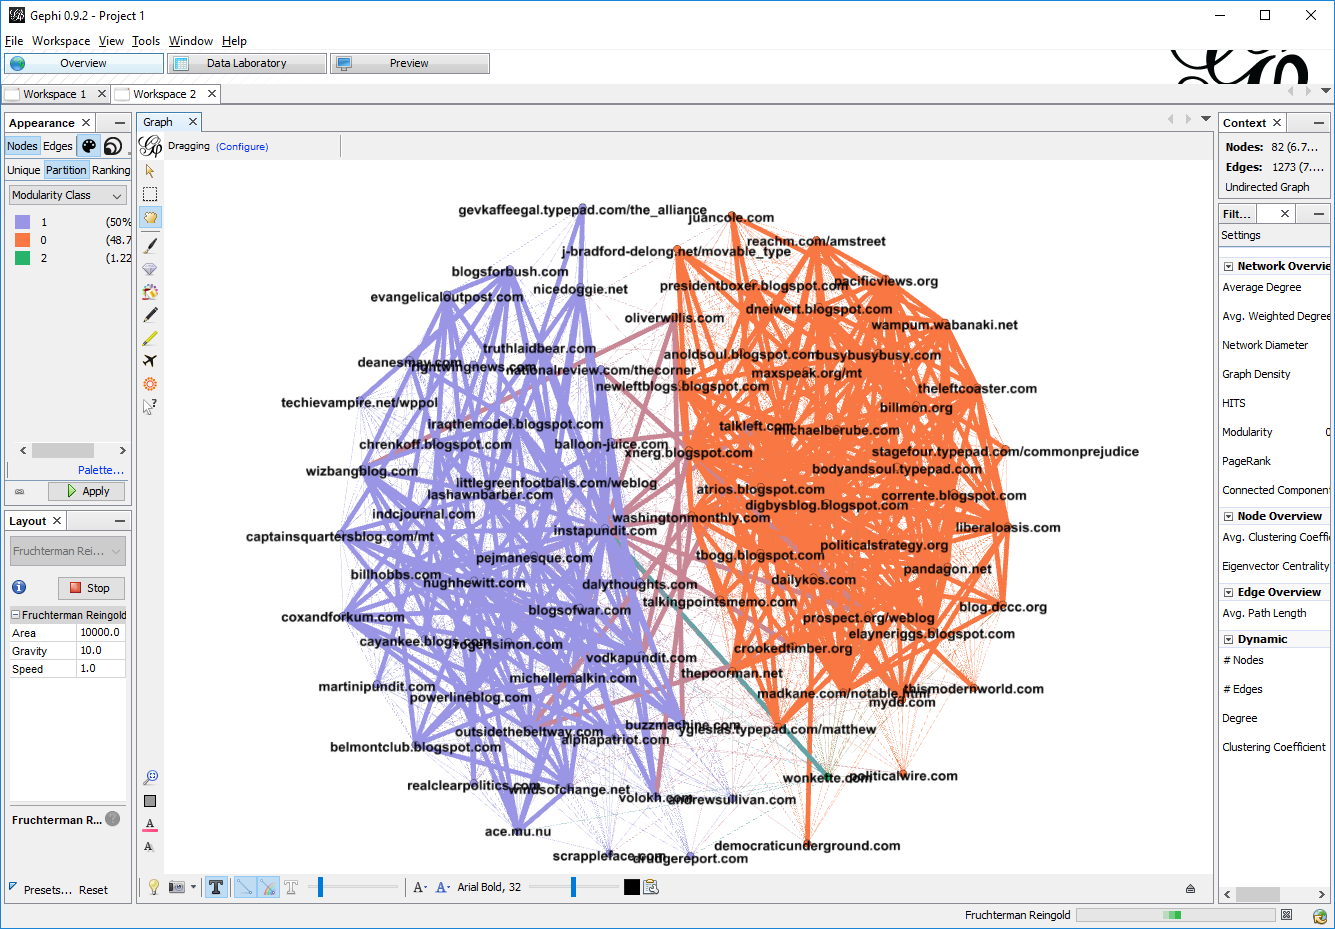

In [10]:
from IPython.display import Image
Image("Political_Blog_Network.png", width=1000, height=1000)

In [11]:
# With Gephi we were able to see the different groups more closely. We can
# now inspect the cliques more closesly to find the most influential right 
# wing blogs and the most influential left wing blogs.

# It turns out that ther first 10 on the list are also th emost influential
# left wing blogs. 

sorted(blog_list, key=lambda x: x[1], reverse=True)[:10]

[('atrios.blogspot.com', 0.19480797936637684),
 ('dailykos.com', 0.1608974020523482),
 ('washingtonmonthly.com', 0.14653924259836862),
 ('digbysblog.blogspot.com', 0.1426436922171831),
 ('bodyandsoul.typepad.com', 0.14113489174330351),
 ('liberaloasis.com', 0.1395237157110786),
 ('tbogg.blogspot.com', 0.1370364169982425),
 ('corrente.blogspot.com', 0.1294175927409614),
 ('talkingpointsmemo.com', 0.12700519780790948),
 ('dneiwert.blogspot.com', 0.12237564692546019)]

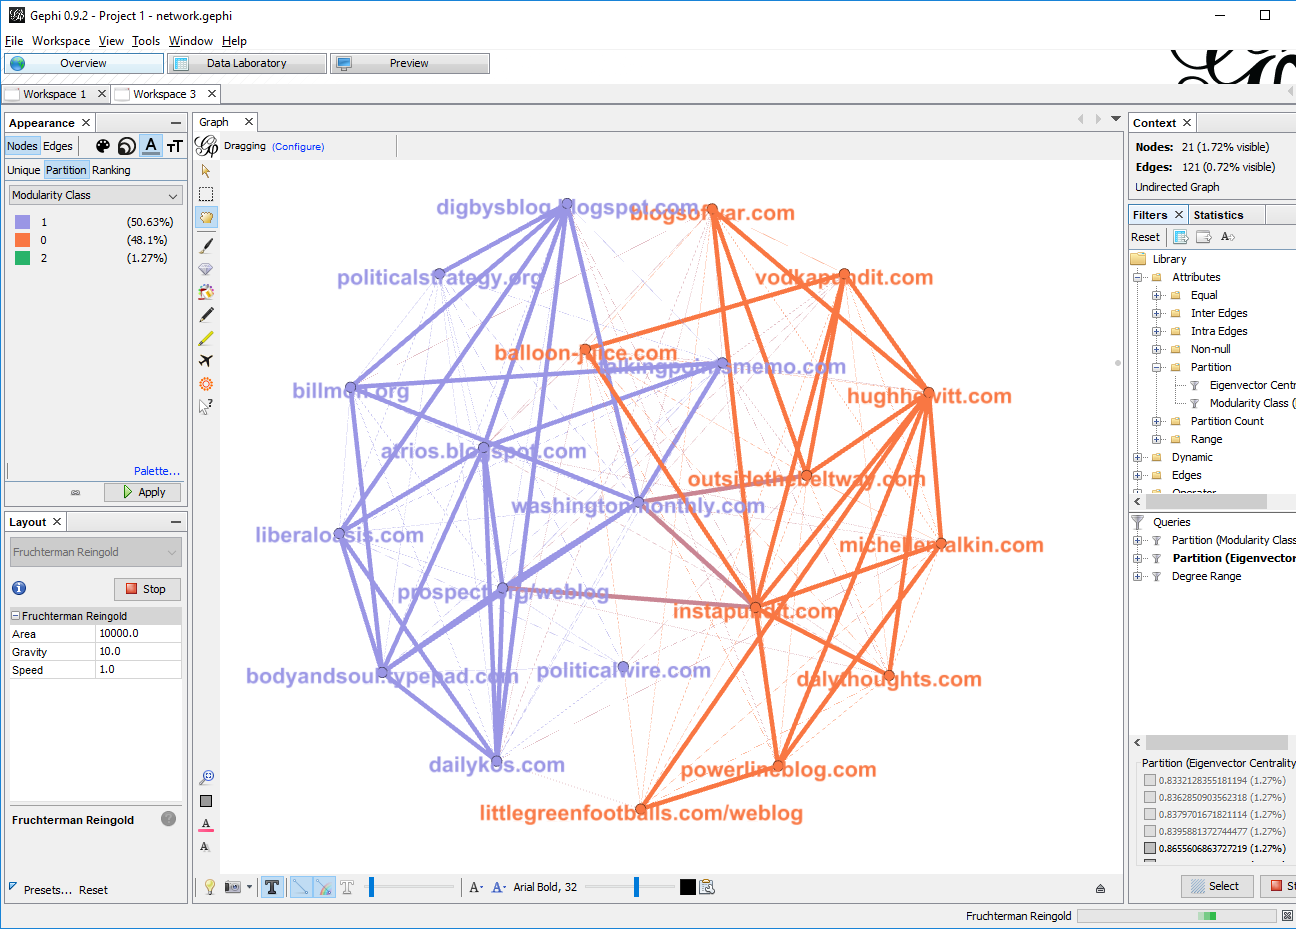

In [12]:
# To find the right wing blogs will be a little harder as the right wing clique
# is not as dense and so the most influential don't appear nicely at the top of 
# the list. There must be some more clever way of doing this. This is taking 
# too long. If we apply the Eignevector Centrality filter to the graph above 
# and only select the top ten of each clique we get the graph below. 

# I think I accidently switched the colors. However, if desired we can alter 
# the colors according to the political affiliation. In any case, we have the
# top ten most influential blogs of each political group.

from IPython.display import Image
Image("Political_Blog_2.png", width=1000, height=1000)